## Visualising Learnt Word Embeddings

In [2]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import keras

from sklearn.manifold import TSNE

input_dir = 'movielens-preprocessing/'
model_dir = 'models/'
model_path = os.path.join(model_dir, 'movie_mf_model_32.h5')
model = keras.models.load_model(model_path)

/Users/akhilpunia/anaconda/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/akhilpunia/anaconda/envs/py36/lib/python3.6/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
emb_layer = model.get_layer('movie_embedding')
(w,) = emb_layer.get_weights()
w.shape

(26744, 32)

In [4]:
w[0]

array([ 0.0493744 , -0.48603162, -0.72300595, -0.26681498, -0.27499047,
       -0.5240773 , -0.08303678, -0.21813807,  0.20106459, -0.24359834,
       -0.513062  , -0.38192248,  0.27176118, -0.21759726,  0.01556036,
       -0.17705755,  0.26620072,  0.23259474, -0.01653305, -0.42012486,
       -0.10722638, -0.35130978, -0.24098925, -0.42874616, -0.09189355,
        0.0101553 , -0.24800986, -0.28053182, -0.07832693, -0.28980651,
       -0.43365264, -0.5313738 ], dtype=float32)

In [70]:
movies_path = os.path.join(input_dir, 'movie.csv')
movies_df = pd.read_csv(movies_path,index_col=0)
movies_df.head()

,movieId,title,genres,key,year,n_ratings,mean_rating
0,0,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995,49695,3.921240
1,1,Jumanji,Adventure|Children|Fantasy,Jumanji,1995,22243,3.211977
2,2,Grumpier Old Men,Comedy|Romance,Grumpier Old Men,1995,12735,3.151040
3,3,Waiting to Exhale,Comedy|Drama|Romance,Waiting to Exhale,1995,2756,2.861393
4,4,Father of the Bride Part II,Comedy,Father of the Bride Part II,1995,12161,3.064592


In [9]:
i_carlin = 26647

i_aziz = movies_df.loc[movies_df.title == 'Aziz Ansari: Live at Madison Square Garden','movieId'].iloc[0]

aziz_vec = w[i_aziz]
carlin_vec = w[i_carlin]

print(aziz_vec,carlin_vec,sep='\n',)

[ 2.7845934e-02  1.7524997e-02 -4.1177445e-03 -2.2051925e-02
 -8.5666971e-07  1.8846379e-08 -1.2099659e-02 -6.3515984e-04
  1.3967775e-02  1.6946821e-02  2.6369160e-02 -3.2503947e-10
  1.4001868e-02  5.3883629e-04 -1.8251598e-30 -2.1488154e-02
 -6.2994502e-04 -1.0849002e-02  1.3864958e-26 -5.1641423e-16
 -1.8715013e-04 -4.7397168e-18  5.8682370e-03  2.4084410e-02
  1.6802415e-04  1.8809259e-02 -1.8061960e-02 -5.7709072e-04
  7.5198826e-03  1.8365363e-02 -1.3482120e-02  2.9820400e-30]
[ 8.9167406e-05 -3.5803545e-02  3.1098818e-02 -8.1661739e-04
  4.1863420e-03  5.7817209e-07  2.0001912e-02 -1.2139407e-02
 -1.1110208e-06 -4.8425641e-02 -3.0420838e-02  1.5125994e-02
  2.0307726e-03  2.9100377e-02 -7.6962919e-05  4.8758672e-08
 -2.6532356e-02 -6.0065268e-03 -1.4856829e-04  8.4564276e-03
  2.6968282e-05  1.1961869e-02 -3.5082292e-02 -1.7911129e-09
  3.2909113e-05  2.7461641e-02 -4.7137253e-03 -2.7378555e-02
 -8.5735426e-04 -1.7823799e-02  8.1342142e-03  2.5294481e-02]


In [10]:
from scipy.spatial import distance

distance.euclidean(aziz_vec, carlin_vec)

0.1498454362154007

In [20]:
i_othello = 25
othello_vec = w[i_ww2]
distance.euclidean(aziz_vec, othello_vec)

1.312180995941162

In [21]:
print(distance.cosine(aziz_vec, carlin_vec),distance.cosine(aziz_vec, othello_vec),sep='\n')

1.30718332529068
0.6913910806179047


> **Observation:**
- A Low Euclidean Distance signifies that two items are similar and vice-versa. Aziz Ansari and George Carlin are both comedians and thus, their shows have a low euclidean. In terms of Cosine distance, value greater than 1 indicates the degree of similarity which is 1.3 for the given case.
- Othello which is classic drama is correctly identified to be on the opposite end of similarity.

In [60]:
from gensim.models.keyedvectors import WordEmbeddingsKeyedVectors

# Limit to movies with at least this many ratings in the dataset
threshold = 100
mainstream_movies = movies_df[movies_df.n_ratings >= threshold].reset_index(drop=True)

movie_embedding_size = w.shape[1]
kv = WordEmbeddingsKeyedVectors(movie_embedding_size)
kv.add(
    mainstream_movies['key'].values,
    w[mainstream_movies.movieId]
)

In [43]:
kv.most_similar('Back to the Future')

/Users/akhilpunia/anaconda/envs/py36/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Ghostbusters (a.k.a. Ghost Busters)', 0.8061003684997559),
 ('Back to the Future Part II', 0.7951242327690125),
 ('Indiana Jones and the Last Crusade', 0.7466860413551331),
 ('Big', 0.7043115496635437),
 ('Back to the Future Part III', 0.7042315006256104),
 ('Raiders of the Lost Ark: The Adaptation', 0.7035232782363892),
 ('Die Hard', 0.6993716955184937),
 ('Groundhog Day', 0.6960607767105103),
 ('Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark)',
  0.6919741630554199),
 ('Karate Kid, The (1984)', 0.6628776788711548)]

/Users/akhilpunia/anaconda/envs/py36/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


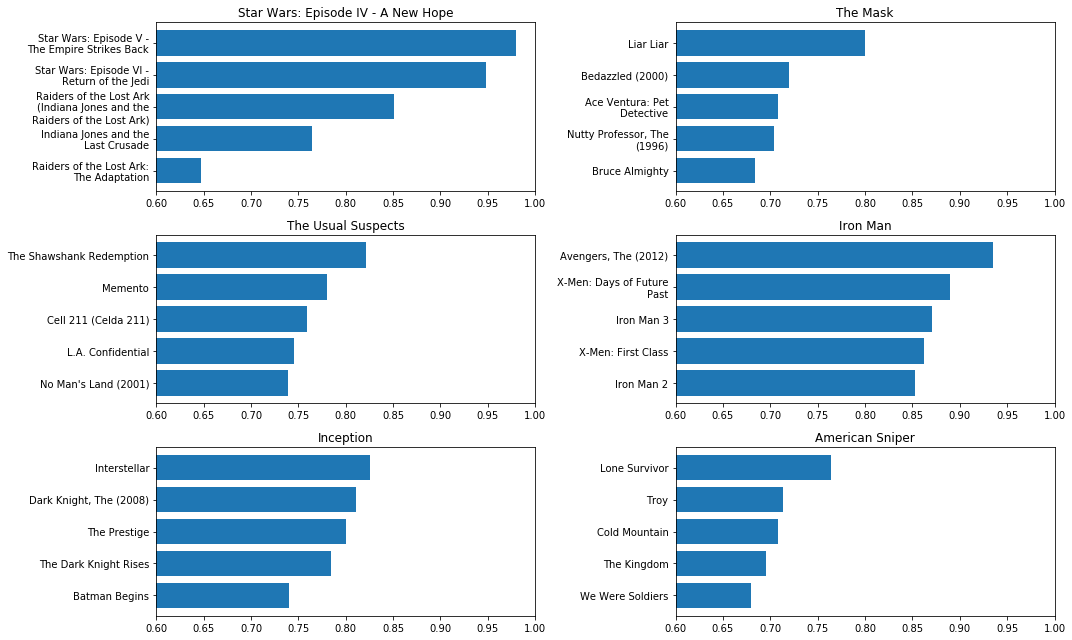

In [69]:
import textwrap
movies = ['Star Wars: Episode IV - A New Hope', 'The Mask', 'The Usual Suspects', 'Iron Man',
          'Inception', 'American Sniper']

def plot_most_similar(movie, ax, topn=5):
    sim = kv.most_similar(movie, topn=topn)[::-1]
    y = np.arange(len(sim))
    w = [t[1] for t in sim]
    ax.barh(y, w)
    left = min(.6, min(w))
    ax.set_xlim(right=1.0, left=left)
    # Split long titles over multiple lines
    labels = [textwrap.fill(t[0] , width=24)
              for t in sim]
    ax.set_yticks(y)
    ax.set_yticklabels(labels)
    ax.set_title(movie)    

fig, axes = plt.subplots(3, 2, figsize=(15, 9))

for movie, ax in zip(movies, axes.flatten()):
    plot_most_similar(movie, ax)
    
fig.tight_layout()
plt.show()

> **Observations:** In general, we see that embeddings have done a good job at  
- Querrting Star Wars identifies all the movies in Sci-Fi and Fantasy genre. It interestingly also suggests its sequels too.
- The Mask correctly brings out all the comedy movies together. Thus, doing a good job at identifying the genre.
- The Nearest Embeddings for Iron Man fetches all the Marvel movies.
- Inception querries surprisingly bring out all the movies from the same director- Christophr Nolan.
- American Sniper fetches an interesting recommendation 'We were Soldiers!', identifying the theme of war and soldiers.

In [71]:
w_full = w
w = w[mainstream_movies.movieId]
df = mainstream_movies

## TSNE 

In [73]:
tsne = TSNE(random_state=1, n_iter=15000, metric="cosine")

embs = tsne.fit_transform(w)
# Add to dataframe for convenience
df['x'] = embs[:, 0]
df['y'] = embs[:, 1]

In [90]:
embs = np.zeros([len(df),2])

In [91]:
embs[:, 0] = df.x
embs[:, 1] = df.y

In [74]:
df = pd.read_csv('movies_tsne.csv')

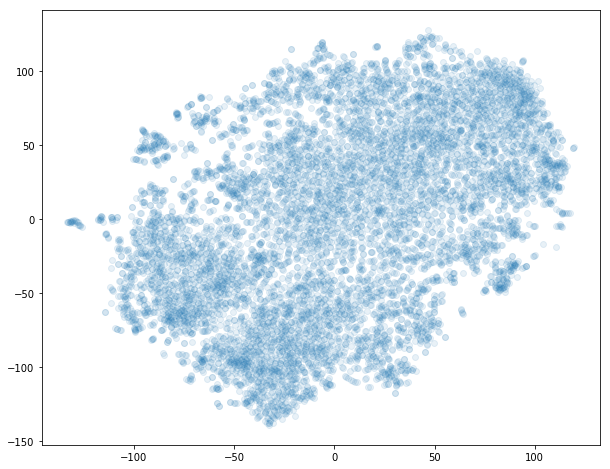

In [81]:
FS = (10, 8)
fig, ax = plt.subplots(figsize=FS)
# Make points translucent so we can visually identify regions with a high density of overlapping points
ax.scatter(df.x, df.y, alpha=.1)
plt.show()

In [92]:
# Some helper functions for plotting annotated t-SNE visualizations

# TODO: adjust_text not available in kernels
try:
    from adjustText import adjust_text
except ImportError:
    def adjust_text(*args, **kwargs):
        pass

def adjust_text(*args, **kwargs):
    pass

def plot_bg(bg_alpha=.01, figsize=(13, 9), emb_2d=None):
    """Create and return a plot of all our movie embeddings with very low opacity.
    (Intended to be used as a basis for further - more prominent - plotting of a 
    subset of movies. Having the overall shape of the map space in the background is
    useful for context.)
    """
    if emb_2d is None:
        emb_2d = embs
    fig, ax = plt.subplots(figsize=figsize)
    X = emb_2d[:, 0]
    Y = emb_2d[:, 1]
    ax.scatter(X, Y, alpha=bg_alpha)
    return ax

def annotate_sample(n, n_ratings_thresh=0):
    """Plot our embeddings with a random sample of n movies annotated.
    Only selects movies where the number of ratings is at least n_ratings_thresh.
    """
    sample = mainstream_movies[mainstream_movies.n_ratings >= n_ratings_thresh].sample(
        n, random_state=1)
    plot_with_annotations(sample.index)

def plot_by_title_pattern(pattern, **kwargs):
    """Plot all movies whose titles match the given regex pattern.
    """
    match = df[df.title.str.contains(pattern)]
    return plot_with_annotations(match.index, **kwargs)

def add_annotations(ax, label_indices, emb_2d=None, **kwargs):
    if emb_2d is None:
        emb_2d = embs
    X = emb_2d[label_indices, 0]
    Y = emb_2d[label_indices, 1]
    ax.scatter(X, Y, **kwargs)

def plot_with_annotations(label_indices, text=True, labels=None, alpha=1, **kwargs):
    ax = plot_bg(**kwargs)
    Xlabeled = embs[label_indices, 0]
    Ylabeled = embs[label_indices, 1]
    if labels is not None:
        for x, y, label in zip(Xlabeled, Ylabeled, labels):
            ax.scatter(x, y, alpha=alpha, label=label, marker='1',
                       s=90,
                      )
        fig.legend()
    else:
        ax.scatter(Xlabeled, Ylabeled, alpha=alpha, color='green')
    
    if text:
        # TODO: Add abbreviated title column
        titles = mainstream_movies.loc[label_indices, 'title'].values
        texts = []
        for label, x, y in zip(titles, Xlabeled, Ylabeled):
            t = ax.annotate(label, xy=(x, y))
            texts.append(t)
        adjust_text(texts, 
                    #expand_text=(1.01, 1.05),
                    arrowprops=dict(arrowstyle='->', color='red'),
                   )
    return ax

FS = (13, 9)
def plot_region(x0, x1, y0, y1, text=True):
    """Plot the region of the mapping space bounded by the given x and y limits.
    """
    fig, ax = plt.subplots(figsize=FS)
    pts = df[
        (df.x >= x0) & (df.x <= x1)
        & (df.y >= y0) & (df.y <= y1)
    ]
    ax.scatter(pts.x, pts.y, alpha=.6)
    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    if text:
        texts = []
        for label, x, y in zip(pts.title.values, pts.x.values, pts.y.values):
            t = ax.annotate(label, xy=(x, y))
            texts.append(t)
        adjust_text(texts, expand_text=(1.01, 1.05))
    return ax

def plot_region_around(title, margin=5, **kwargs):
    """Plot the region of the mapping space in the neighbourhood of the the movie with
    the given title. The margin parameter controls the size of the neighbourhood around
    the movie.
    """
    xmargin = ymargin = margin
    match = df[df.title == title]
    assert len(match) == 1
    row = match.iloc[0]
    return plot_region(row.x-xmargin, row.x+xmargin, row.y-ymargin, row.y+ymargin, **kwargs)

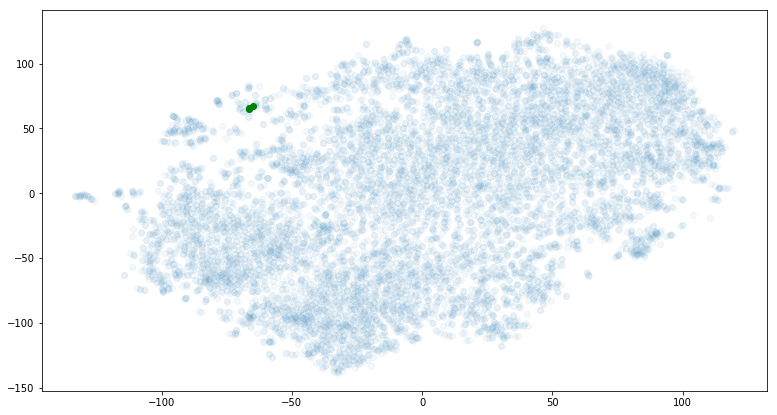

In [115]:
# This and several other helper functions are defined in a code cell above. Hit the "code"
# button above if you're curious about how they're implemented.

plot_by_title_pattern('Iron Man', figsize=(13, 7), bg_alpha=.05, text=False)
plt.show()

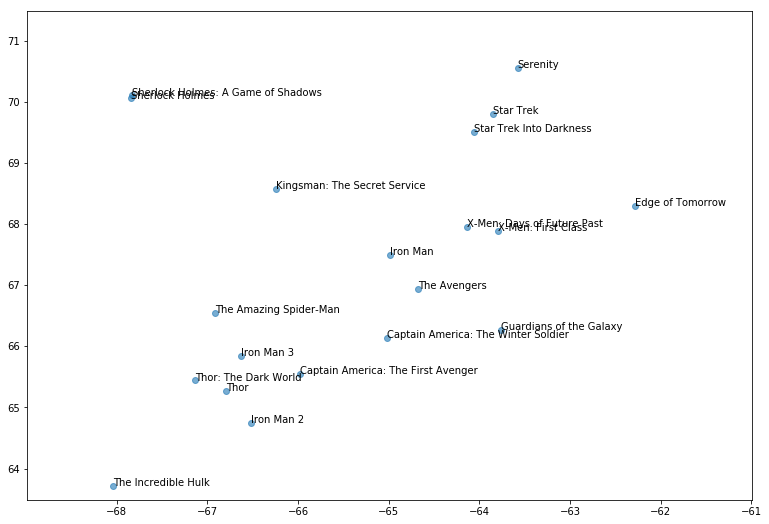

In [111]:
plot_region_around('Iron Man', 4)
plt.show()

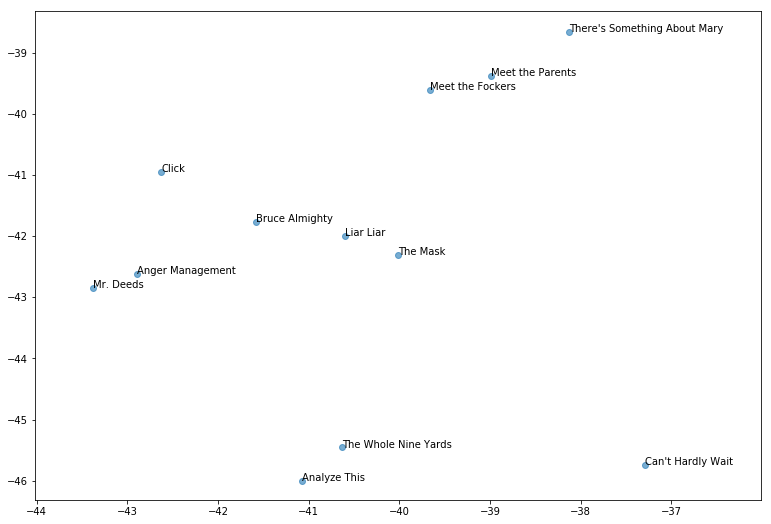

In [110]:
plot_region_around('The Mask', 4)
plt.show()